In [135]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def MMA_function(img_path, threshold, mini_size, kernel_size):

    # 1. apply intensity thresholding (using multiple to segment out intensities within a range)
    img = cv2.imread(img_path, 0)
    mask = cv2.inRange(img, threshold[0], threshold[1])

    # 2. use binary morphology operators to fill any holes and filter out noise pixels in the segmentation
    def fill_holes(binary_img, kernel_size):
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        # Perform morphological operations to fill the holes
        img_threshold = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)
        return img_threshold

    # 3. use binary reconstruction and subtraction to get rid of segmented objects touching the image boundary
    def find_borderitem(binary_img):
        seed = np.zeros_like(binary_img)
        seed[5, :] = binary_img[5, :] # top row
        seed[-5, :] = binary_img[-5, :] # bottom row
        seed[:, 5] = binary_img[:, 5] # left column
        seed[:, -5] = binary_img[:, -5] # right column
        kernel = np.ones((3, 3), np.uint8)
        # Perform morphological operations to fill the holes
        while True:
            new_seed = cv2.bitwise_and(cv2.dilate(seed, kernel), binary_img)
            if np.array_equal(seed, new_seed):
                break
            seed = new_seed
        return seed
    
    # 4. set the remaining objects that are smaller than some size threshold to black
    def remove_small_objects(binary_img, min_size):
        count, labels, stats, controids = cv2.connectedComponentsWithStats(binary_img)
        bg = np.zeros_like(binary_img)
        # 5. count and print the final number of objects.
        item_sum = 0
        for i in range(1, count):
            if stats[i, cv2.CC_STAT_AREA] >= min_size:
                bg[labels == i] = 255
                item_sum += 1
        print('The number of objects:', item_sum)
        return bg
    
    fill_holes_img = fill_holes(mask, kernel_size)
    img_constructed = find_borderitem(fill_holes_img)
    img_removeEdge = cv2.subtract(fill_holes_img, img_constructed)
    img_removeSmall = remove_small_objects(img_removeEdge, mini_size)
    plt.imshow(img_removeSmall, cmap='gray')
    
 

The number of objects: 72


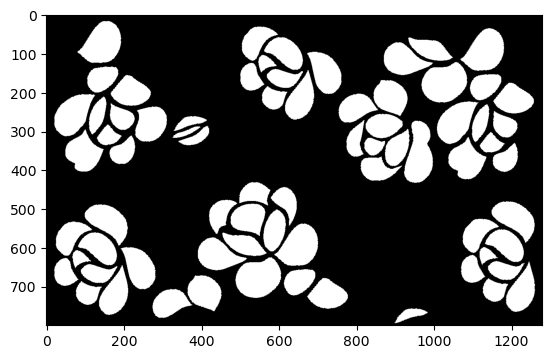

In [137]:
MMA_Leaves = MMA_function('Images/Leaves.jpg', (125, 140), 100, 3)

The number of objects: 20


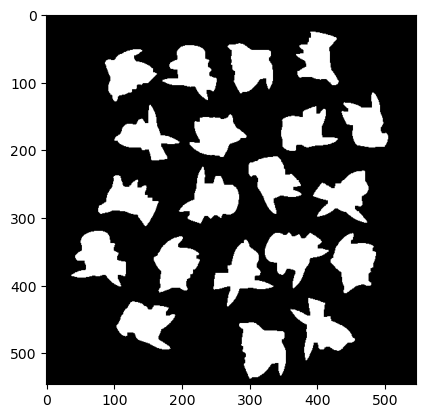

In [138]:
MMA_Pikachus = MMA_function('Images/Pikachus.jpg', (100, 255), 370, 5)

The number of objects: 21


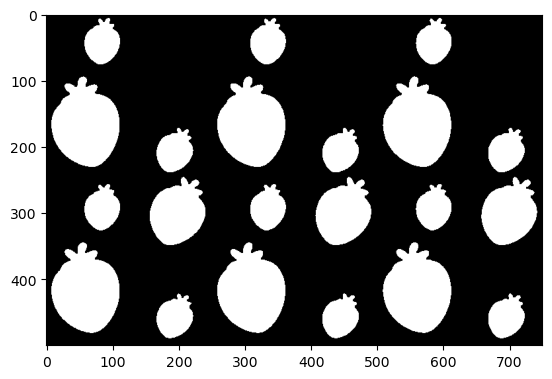

In [139]:
MMA_Strawberries = MMA_function('Images/Strawberries.jpg', (100, 200), 760, 3)